**IMPORTING ALL ESSENTIAL LIBRARIES**

In [ ]:
# Import necessary libraries
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from pyngrok import ngrok
import joblib
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
# Install necessary packages
!pip install nltk
!pip install streamlit
!pip install pyngrok
import streamlit as st
from nltk.sentiment.vader import SentimentIntensityAnalyzer



**DATASET LOADING AND DISPLAYING 5 ROWS**

In [ ]:
# Upload file (this will open a file dialog for uploading)
uploaded = files.upload()

# Load the dataset (replace 'iphone.csv' with the name of your uploaded file)
iphone_data = pd.read_csv("iphone.csv")

# Display the first few rows to understand the structure
iphone_data.head()


Saving iphone.csv to iphone (1).csv


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


**DISPLAYING LAST 5 ROWS**

In [ ]:
iphone_data.tail()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3061,B09G9D8KRQ,India,11-11-2023,True,1,Batter power needs to be improved,Battery power is be very bad need to chat on d...,https://www.amazon.in/gp/customer-reviews/R2QO...,Reviewed in India on 11 November 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


**DATA OVERVIEW AND DATA CLEANING**

In [ ]:
iphone_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [ ]:
iphone_data.isnull().sum()


,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


In [ ]:
iphone_data = iphone_data.dropna(subset=['reviewDescription'])


In [ ]:
columns_to_drop = ['reviewUrl', 'reviewedIn', 'variantAsin']
iphone_data_cleaned = iphone_data.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
iphone_data_cleaned['date'] = pd.to_datetime(iphone_data_cleaned['date'], errors='coerce', dayfirst=True)


In [ ]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

iphone_data_cleaned['sentiment'] = iphone_data_cleaned['ratingScore'].apply(label_sentiment)


In [ ]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters, punctuation, and numbers
    return text

iphone_data_cleaned['cleaned_review'] = iphone_data_cleaned['reviewDescription'].apply(preprocess_text)


In [ ]:
iphone_data_cleaned.describe()


,date,ratingScore
count,2976,2976.000000
mean,2023-10-30 02:07:15.483870720,3.747312
min,2021-09-24 00:00:00,1.000000
25%,2023-07-06 00:00:00,2.000000
50%,2024-01-03 00:00:00,5.000000
75%,2024-06-04 06:00:00,5.000000
max,2024-09-19 00:00:00,5.000000
std,NaN,1.584163


In [ ]:
iphone_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2976 entries, 0 to 3061
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   productAsin        2976 non-null   object        
 1   country            2976 non-null   object        
 2   date               2976 non-null   datetime64[ns]
 3   isVerified         2976 non-null   bool          
 4   ratingScore        2976 non-null   int64         
 5   reviewTitle        2976 non-null   object        
 6   reviewDescription  2976 non-null   object        
 7   variant            2976 non-null   object        
 8   sentiment          2976 non-null   object        
 9   cleaned_review     2976 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 235.4+ KB


**EXPLORATORY DATA ANALYSIS**

Distribution Of Rating Scores 1-5 Against Counts/Numbers

<ipython-input-22-dbbe47931e9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ratingScore', data=iphone_data_cleaned, palette='viridis')


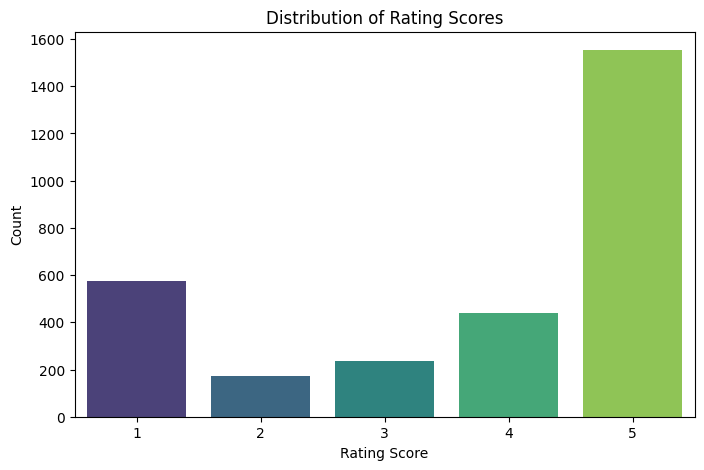

In [ ]:


plt.figure(figsize=(8, 5))
sns.countplot(x='ratingScore', data=iphone_data_cleaned, palette='viridis')
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()


Distribution Of Sentiments POSITIVE, NEGATIVE & NEUTRAL Against Counts.

<ipython-input-23-c3282d7fcd01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=iphone_data_cleaned, palette='viridis')


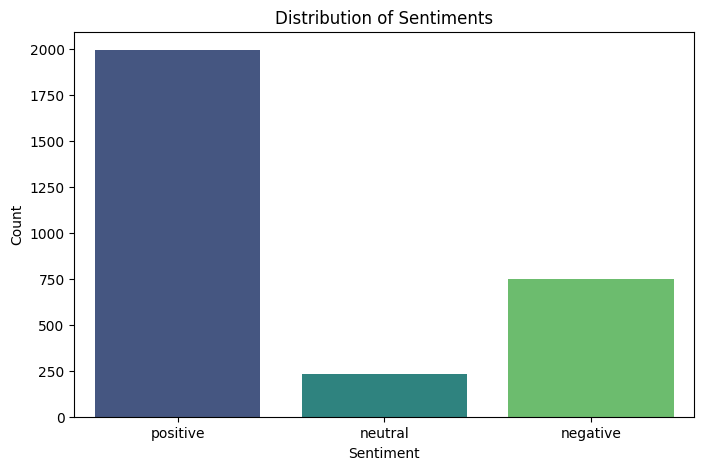

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=iphone_data_cleaned, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Average Rating Against Different Time-Period Over An Year.

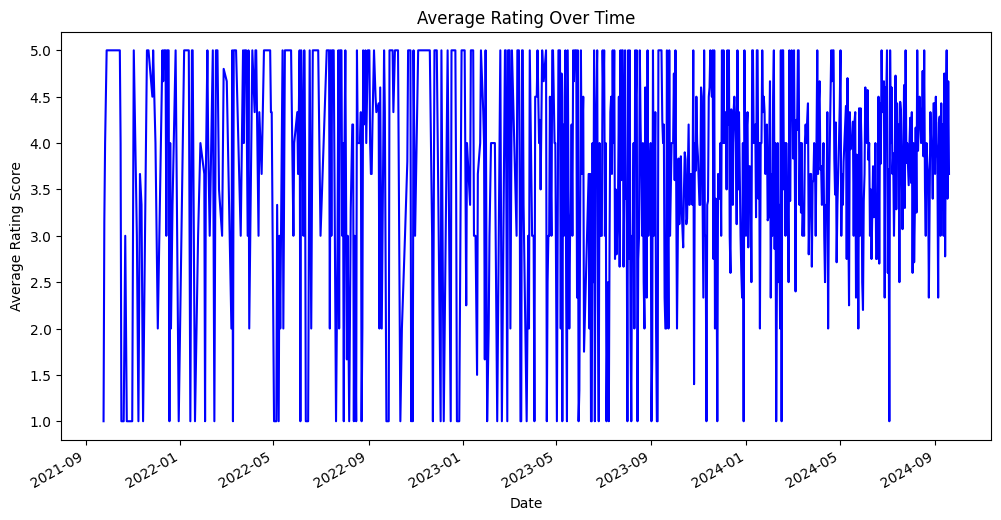

In [ ]:
plt.figure(figsize=(12, 6))
iphone_data_cleaned.groupby('date')['ratingScore'].mean().plot(kind='line', color='blue')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating Score')
plt.show()


In [ ]:
iphone_data_cleaned['review_length'] = iphone_data_cleaned['cleaned_review'].apply(len)


Number Of Reviews With Word Count.

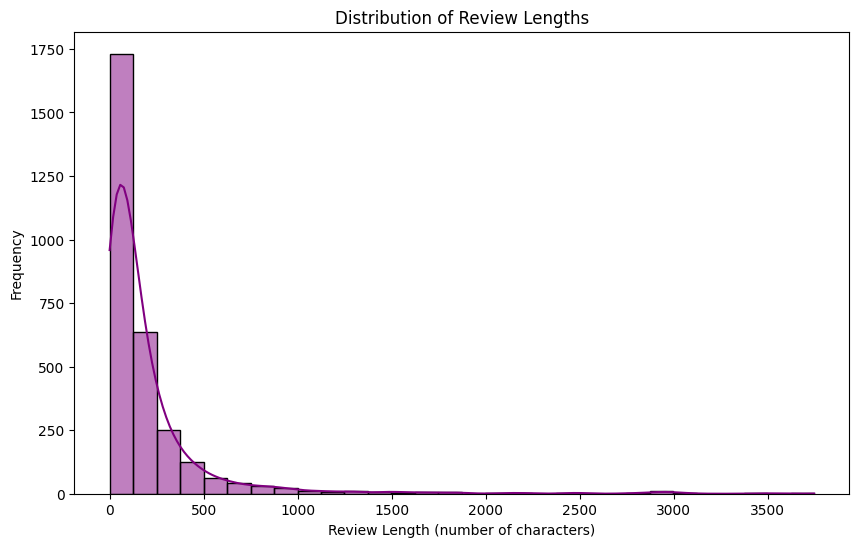

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(iphone_data_cleaned['review_length'], kde=True, color='purple', bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (number of characters)')
plt.ylabel('Frequency')
plt.show()


Review Length For Each Sentiment.

<ipython-input-27-14ac1f26ed6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=iphone_data_cleaned, palette='viridis')


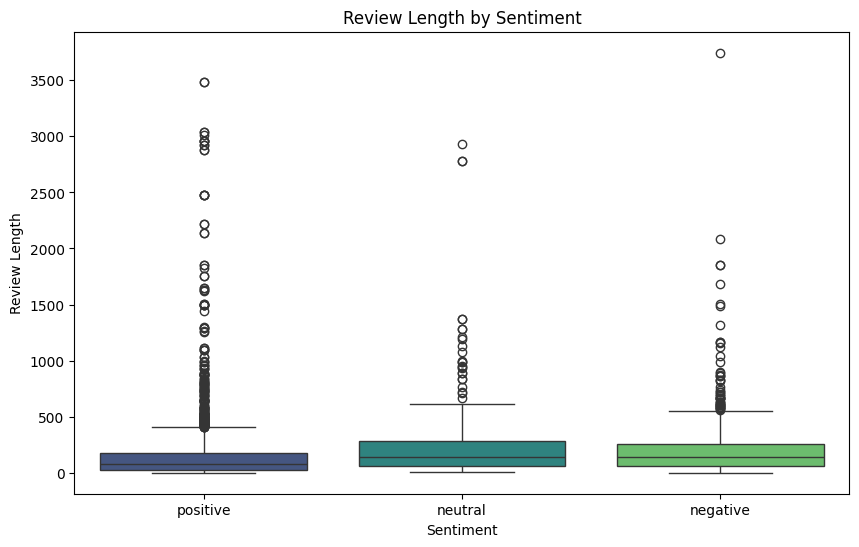

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=iphone_data_cleaned, palette='viridis')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


Whole Word Cloud To Get An Image Of Most Used Words.

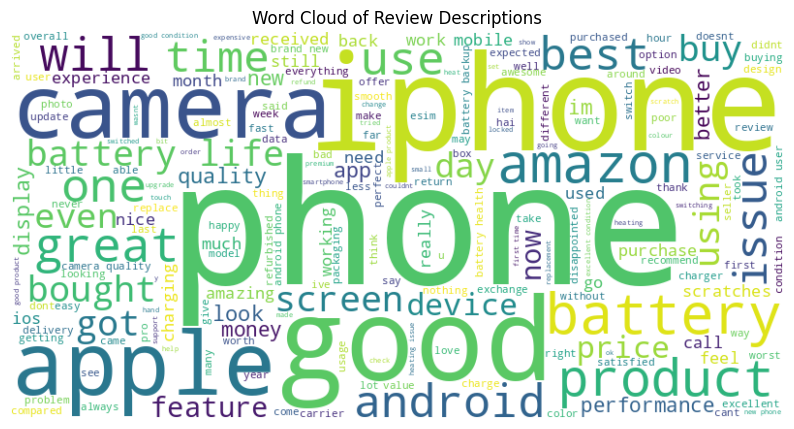

In [ ]:
all_reviews = " ".join(review for review in iphone_data_cleaned['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Descriptions')
plt.show()


Word Cloud For Most Positive & Negative Used Words.

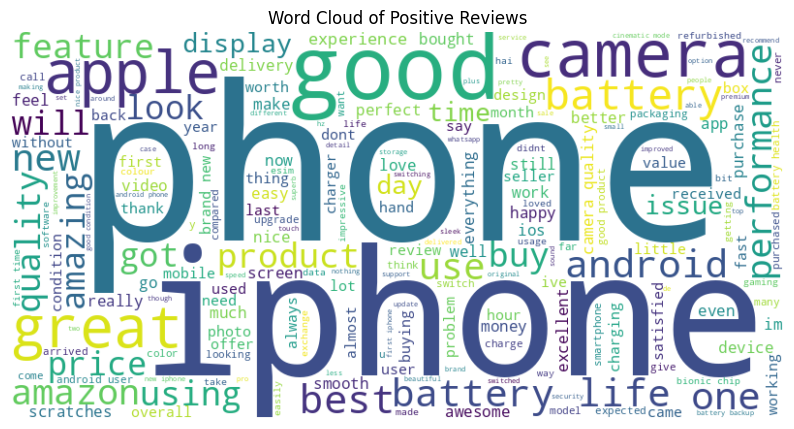

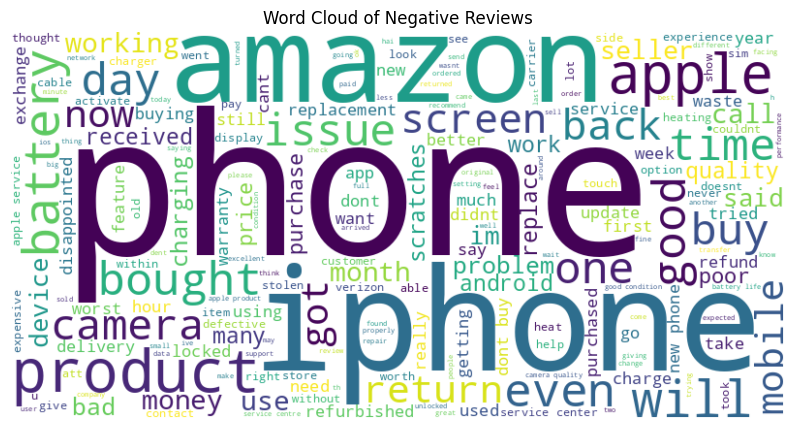

In [ ]:
positive_reviews = " ".join(iphone_data_cleaned[iphone_data_cleaned['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = " ".join(iphone_data_cleaned[iphone_data_cleaned['sentiment'] == 'negative']['cleaned_review'])

# Generate and plot word clouds for positive and negative reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plotting the positive review word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Plotting the negative review word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()


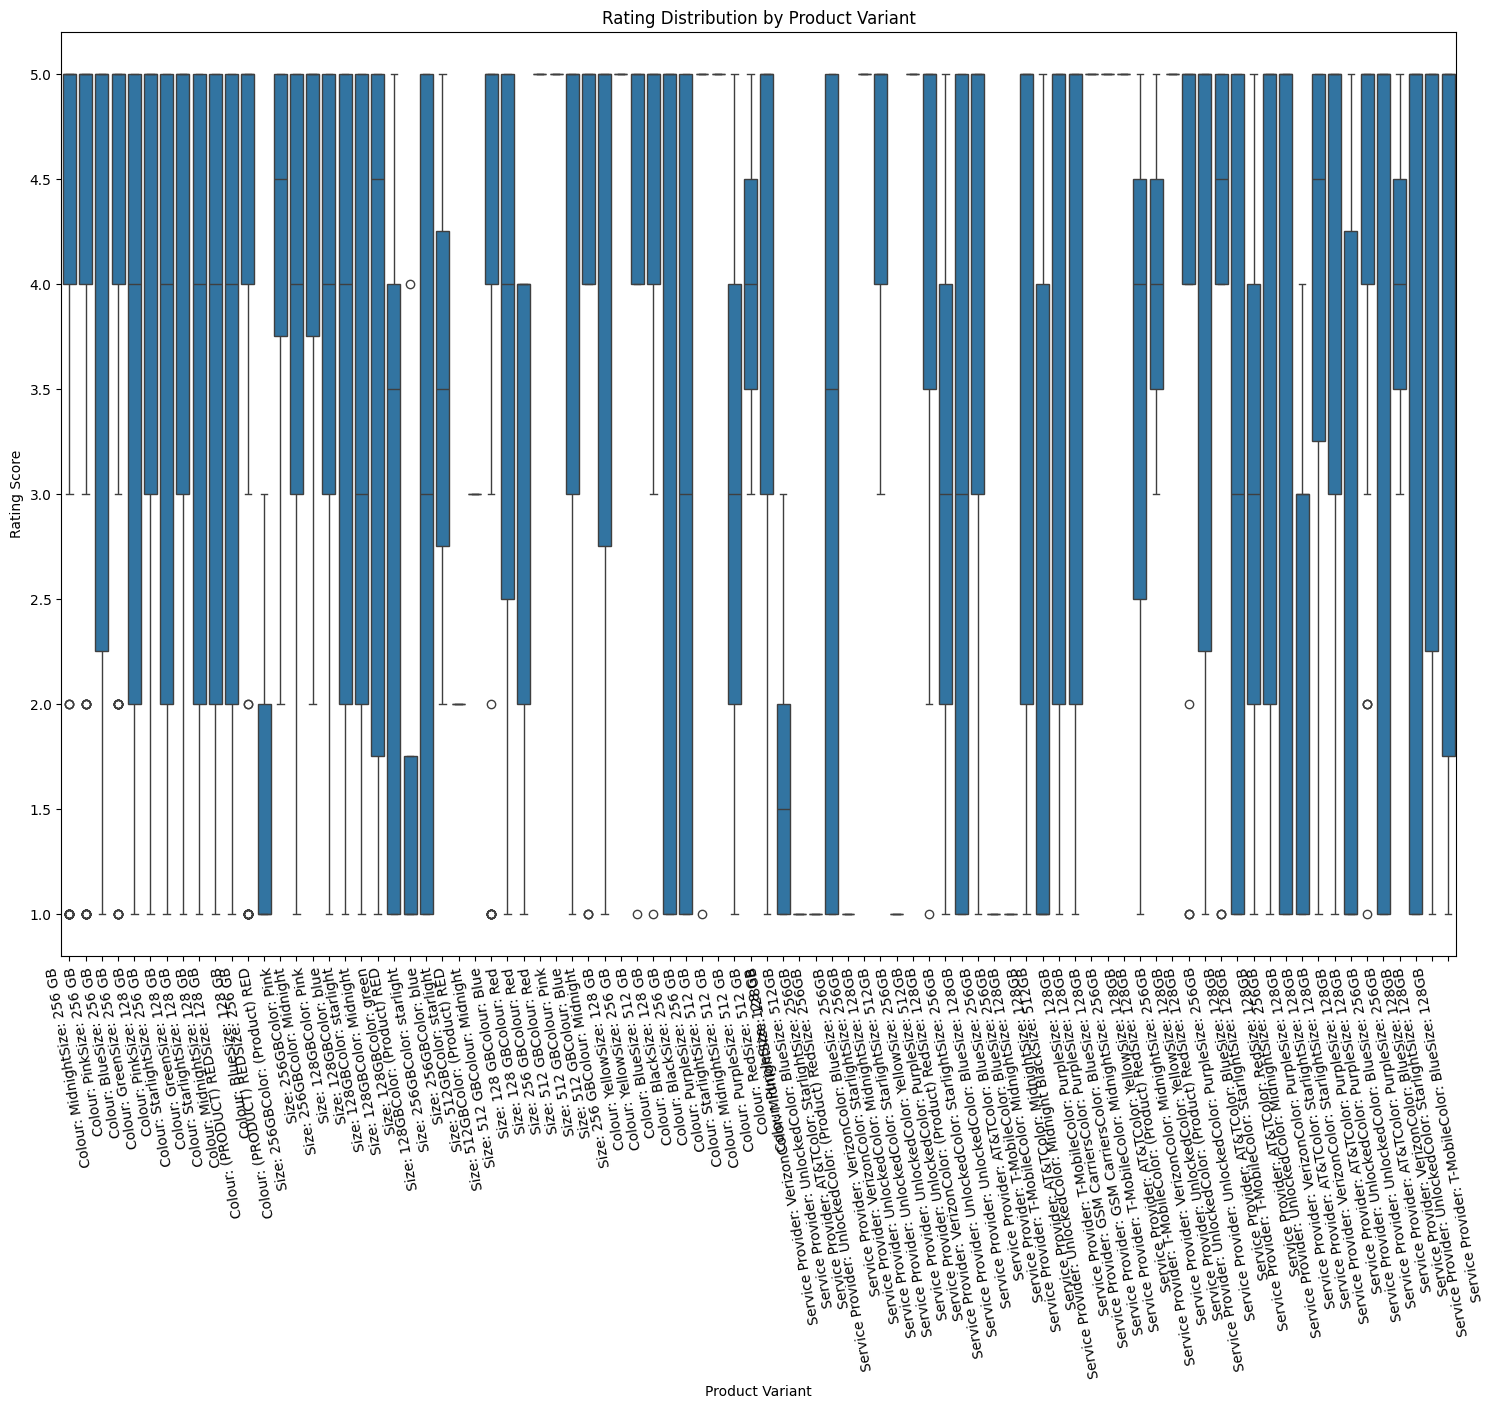

In [ ]:
plt.figure(figsize=(18, 12))
sns.boxplot(x='variant', y='ratingScore', data=iphone_data_cleaned)
plt.title('Rating Distribution by Product Variant')
plt.xticks(rotation=100)
plt.xlabel('Product Variant')
plt.ylabel('Rating Score')
plt.show()


Rating Score By Different Countries.

<ipython-input-31-e20564f0e85a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='ratingScore', data=iphone_data_cleaned, palette='viridis')


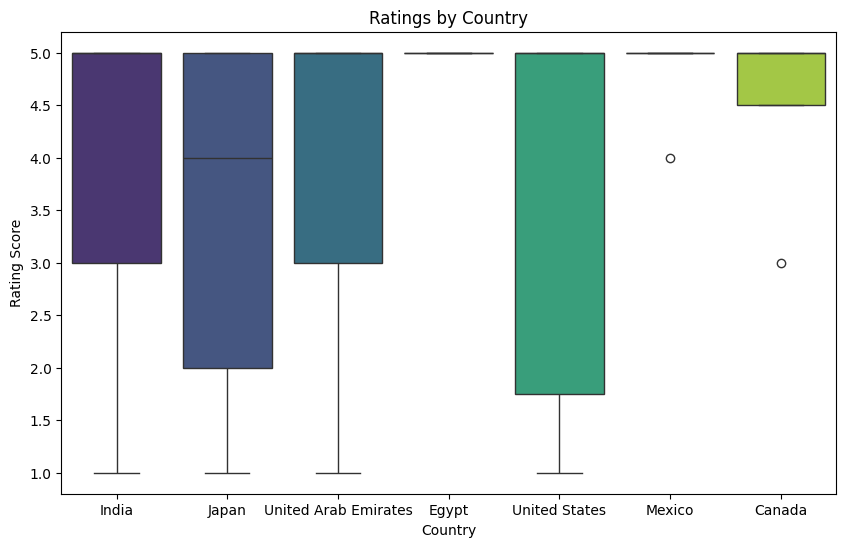

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='ratingScore', data=iphone_data_cleaned, palette='viridis')
plt.title('Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Rating Score')
plt.show()


Sentimental Count Over Period Of Time.

<Figure size 1800x1200 with 0 Axes>

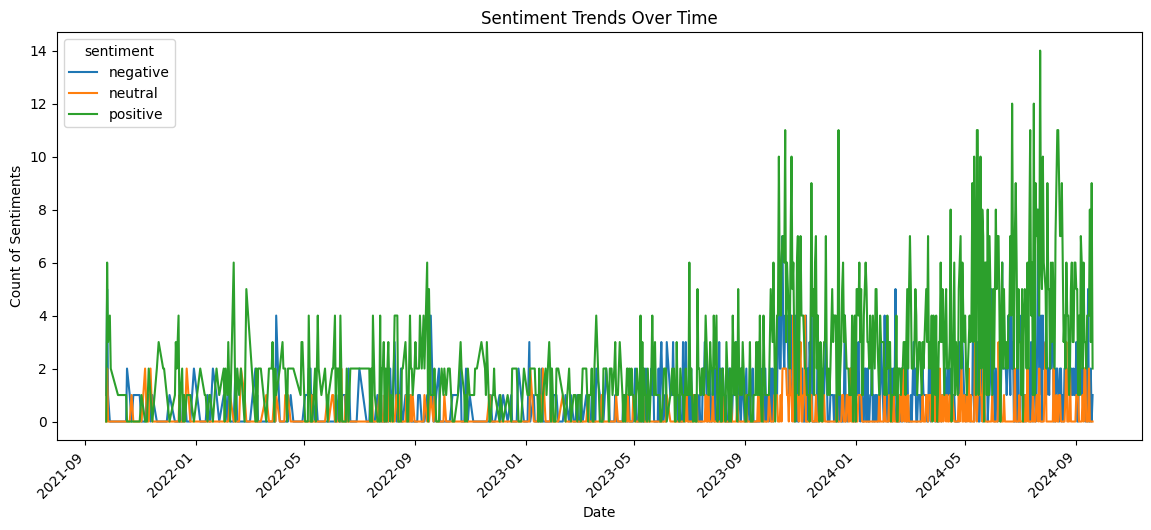

In [ ]:
plt.figure(figsize=(18, 12))
sentiment_over_time = iphone_data_cleaned.groupby('date')['sentiment'].value_counts().unstack().fillna(0)
sentiment_over_time.plot(kind='line', stacked=False, figsize=(14, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.show()


**VADER NON-ML MODELLING**

In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize the SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# Function to get VADER sentiment
def get_vader_sentiment(review):
    # Calculate the sentiment scores
    scores = sid.polarity_scores(review)
    compound_score = scores['compound']

    # Classify based on the compound score
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the cleaned reviews
iphone_data_cleaned['vader_sentiment'] = iphone_data_cleaned['cleaned_review'].apply(get_vader_sentiment)

# Display the first few rows to verify
iphone_data_cleaned[['cleaned_review', 'sentiment', 'vader_sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_review,sentiment,vader_sentiment
0,every thing is good about iphones theres nothi...,positive,negative
1,it look so fabulous i am android user switched...,positive,positive
2,i tried to flip camera while recording but no ...,positive,negative
3,genuine,positive,neutral
4,happy to get the iphone in amazon offer,positive,positive


In [ ]:
comparison_df = iphone_data_cleaned[['sentiment', 'vader_sentiment']].value_counts().reset_index(name='count')
print(comparison_df)


  sentiment vader_sentiment  count
0  positive        positive   1656
1  negative        negative    390
2  negative        positive    219
3  positive         neutral    199
4  positive        negative    139
5  negative         neutral    138
6   neutral        positive    125
7   neutral        negative     65
8   neutral         neutral     45


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(iphone_data_cleaned['sentiment'], iphone_data_cleaned['vader_sentiment'])
print(f'Accuracy of VADER Sentiment Analysis: {accuracy:.2f}')


Accuracy of VADER Sentiment Analysis: 0.70


**LOGISTIC REGRESSION**

In [ ]:
# Step 1: Feature Extraction - TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to 5000 most important terms
X = tfidf.fit_transform(iphone_data_cleaned['cleaned_review']).toarray()

# Step 2: Splitting the Data
y = iphone_data_cleaned['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 4: Predict on Test Set
y_pred_log = log_reg.predict(X_test)

# Step 5: Evaluate Performance
print("Logistic Regression Model Accuracy: ", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Model Accuracy:  0.8238255033557047
              precision    recall  f1-score   support

    negative       0.82      0.65      0.73       138
     neutral       0.50      0.05      0.08        44
    positive       0.83      0.96      0.89       414

    accuracy                           0.82       596
   macro avg       0.72      0.55      0.57       596
weighted avg       0.80      0.82      0.79       596



**NAIVE-BAYES**

In [ ]:
# Step 3: Train the Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Step 4: Predict on Test Set
y_pred_nb = nb.predict(X_test)

# Step 5: Evaluate Performance
print("Naive Bayes Model Accuracy: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model Accuracy:  0.7667785234899329
              precision    recall  f1-score   support

    negative       0.98      0.31      0.47       138
     neutral       0.00      0.00      0.00        44
    positive       0.75      1.00      0.86       414

    accuracy                           0.77       596
   macro avg       0.58      0.44      0.44       596
weighted avg       0.75      0.77      0.70       596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**TUNING HYPER-PARAMETERS OF LOGISTIC REGRESSOR**

In [ ]:
# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and best model score
print("Best parameters found: ", grid.best_params_)
print("Best model accuracy: ", grid.best_score_)


Best parameters found:  {'C': 10, 'solver': 'liblinear'}
Best model accuracy:  0.8172268907563025


**SUPPORT VECTOR MACHINE MODELLING**

In [ ]:
# Step 3: Train the SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 4: Predict on Test Set
y_pred_svm = svm.predict(X_test)

# Step 5: Evaluate Performance
print("SVM Model Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy:  0.837248322147651
              precision    recall  f1-score   support

    negative       0.82      0.71      0.76       138
     neutral       0.50      0.05      0.08        44
    positive       0.85      0.96      0.90       414

    accuracy                           0.84       596
   macro avg       0.72      0.57      0.58       596
weighted avg       0.81      0.84      0.81       596



In [ ]:
# Define a smaller parameter grid for lightweight RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Only using linear kernel for speed
}

# Set up RandomizedSearchCV with fewer iterations and faster parameters
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=3, cv=2, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Retrieve and evaluate the best model
best_svm_model = random_search.best_estimator_

# Predict and evaluate
y_pred_best_svm = best_svm_model.predict(X_test)

# Accuracy and Classification Report
print("Final SVM Model Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test, y_pred_best_svm)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_svm))


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Final SVM Model Accuracy on Test Set: 0.84

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.71      0.76       138
     neutral       0.50      0.05      0.08        44
    positive       0.85      0.96      0.90       414

    accuracy                           0.84       596
   macro avg       0.72      0.57      0.58       596
weighted avg       0.81      0.84      0.81       596



In [ ]:
# Separate majority and minority classes
neutral_class = iphone_data_cleaned[iphone_data_cleaned['sentiment'] == 'neutral']
non_neutral_class = iphone_data_cleaned[iphone_data_cleaned['sentiment'] != 'neutral']

# Upsample the neutral class
neutral_upsampled = resample(neutral_class, replace=True, n_samples=len(non_neutral_class)//2, random_state=42)

# Combine the classes to create a balanced dataset
balanced_data = pd.concat([neutral_upsampled, non_neutral_class])

# Prepare features and labels again
X_balanced = tfidf.fit_transform(balanced_data['cleaned_review']).toarray()
y_balanced = balanced_data['sentiment']

# Train/Test split with balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [ ]:
# Train SVM with class weighting
svm_weighted = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)

# Predict on the test set
y_pred_weighted = svm_weighted.predict(X_test)

# Evaluate the performance
print("Weighted SVM Model Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test, y_pred_weighted)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))


Weighted SVM Model Accuracy on Test Set: 0.82

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.78      0.76       138
     neutral       0.37      0.52      0.43        44
    positive       0.93      0.87      0.90       414

    accuracy                           0.82       596
   macro avg       0.68      0.72      0.70       596
weighted avg       0.84      0.82      0.83       596



In [ ]:
# Separate majority and minority classes
neutral_class = iphone_data_cleaned[iphone_data_cleaned['sentiment'] == 'neutral']
non_neutral_class = iphone_data_cleaned[iphone_data_cleaned['sentiment'] != 'neutral']

# Upsample the neutral class
neutral_upsampled = resample(neutral_class, replace=True, n_samples=len(non_neutral_class) // 2, random_state=42)

# Combine the classes to create a balanced dataset
balanced_data = pd.concat([neutral_upsampled, non_neutral_class])

# Prepare features and labels again with n-grams
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_balanced_ngram = tfidf_ngram.fit_transform(balanced_data['cleaned_review']).toarray()
y_balanced_ngram = balanced_data['sentiment']

# Train/Test split with balanced data
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced_ngram, y_balanced_ngram, test_size=0.2, random_state=42)

# Train the weighted SVM model on the upsampled and balanced data
svm_combined = SVC(kernel='linear', C=1, class_weight='balanced', random_state=42)
svm_combined.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_combined = svm_combined.predict(X_test_balanced)

# Evaluate performance
print("Combined Weighted SVM Model Accuracy on Test Set: {:.2f}".format(accuracy_score(y_test_balanced, y_pred_combined)))
print("\nClassification Report:")
print(classification_report(y_test_balanced, y_pred_combined))


Combined Weighted SVM Model Accuracy on Test Set: 0.90

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.81      0.79       141
     neutral       0.91      0.95      0.93       298
    positive       0.93      0.89      0.91       384

    accuracy                           0.90       823
   macro avg       0.87      0.88      0.88       823
weighted avg       0.90      0.90      0.90       823

